In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-08-07 20:01:18.675702: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 20:01:18.675913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 20:01:18.865889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
covid_dir = '/kaggle/input/sarscov2-ctscan-dataset/COVID'
non_covid_dir = '/kaggle/input/sarscov2-ctscan-dataset/non-COVID'

In [4]:
# Load and preprocess data
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

In [5]:
covid_images, covid_labels = load_images_from_folder(covid_dir, 1)
non_covid_images, non_covid_labels = load_images_from_folder(non_covid_dir, 0)

In [6]:
images = np.array(covid_images + non_covid_images)
labels = np.array(covid_labels + non_covid_labels)

In [7]:
# Normalize images
images = images / 255.0

In [8]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.5463 - loss: 1.3623 - val_accuracy: 0.8109 - val_loss: 0.4797
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7656 - loss: 0.5171 - val_accuracy: 0.8793 - val_loss: 0.3173
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8302 - loss: 0.3823 - val_accuracy: 0.8672 - val_loss: 0.3307
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9027 - loss: 0.2356 - val_accuracy: 0.9054 - val_loss: 0.2470
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9142 - loss: 0.2204 - val_accuracy: 0.9155 - val_loss: 0.2024
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9396 - loss: 0.1586 - val_accuracy: 0.9316 - val_loss: 0.1774
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9646 - loss: 0.1082 - val_accuracy: 0.9256 - val_loss: 0.2117
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9528 - loss: 0.1252 - val_accuracy: 0.9416 - v

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 536ms/step - accuracy: 0.9414 - loss: 0.2146
Validation accuracy: 93.56%


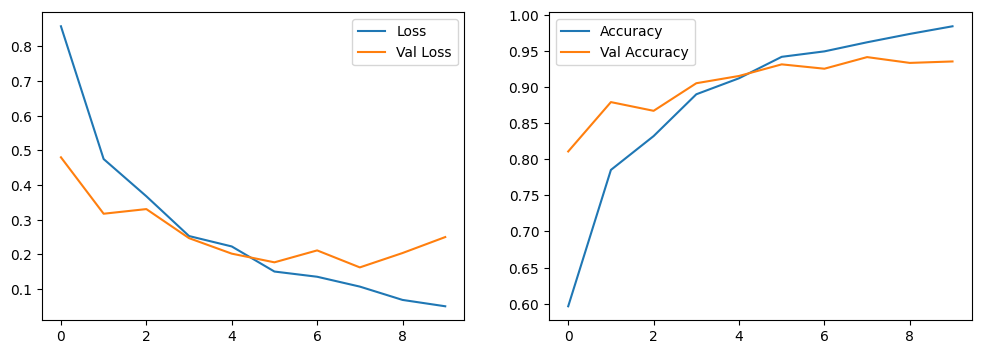

In [12]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()